1080 1920


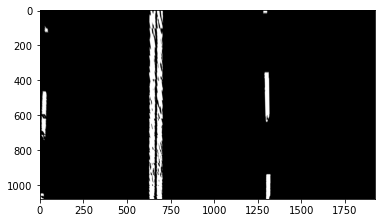

In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("./tmp.jpg", cv2.IMREAD_COLOR)
img_org = cv2.imread("./tmp.jpg", cv2.IMREAD_COLOR)

img_height, img_width = img.shape[:2]

src = np.float32([[100, 901], [1820, 901],
                  [498, 726], [1422, 726]])
dst = np.float32([[100, 1080], [1820, 1080],
                  [100, 0], [1820, 0]])

M = cv2.getPerspectiveTransform(src, dst)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_yello = cv2.inRange(img_hsv, (14,127,0), (20,255,255))
mask_white = cv2.inRange(img_hsv, (0,0,127), (279,25,255))
mask_lane = cv2.bitwise_or(mask_yello, mask_white)

img_warped = cv2.warpPerspective(mask_lane, M, [img_width, img_height])

print(img_height, img_width)
plt.imshow(img_warped, cmap="gray")
plt.show()

1049 1845


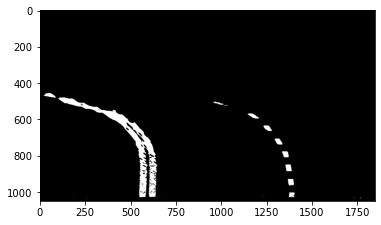

In [66]:
img = cv2.imread("./tmp.jpg", cv2.IMREAD_COLOR)
img_org = cv2.imread("./tmp.jpg", cv2.IMREAD_COLOR)

img_height, img_width = img.shape[:2]

src = np.float32([[593, 1049], [1381, 1049],
                  [915, 637], [1000, 637]])
dst = np.float32([[593, 1049], [1381, 1049],
                  [593, 0], [1381, 0]])

M = cv2.getPerspectiveTransform(src, dst)

img_warped = cv2.warpPerspective(img, M, [img_width, img_height])

img_hsv = cv2.cvtColor(img_warped, cv2.COLOR_BGR2HSV)
mask_yello = cv2.inRange(img_hsv, (14,127,0), (20,255,255))
mask_white = cv2.inRange(img_hsv, (0,0,127), (279,25,255))
mask_lane = cv2.bitwise_or(mask_yello, mask_white)


print(img_height, img_width)
plt.imshow(mask_lane, cmap="gray")
plt.show()

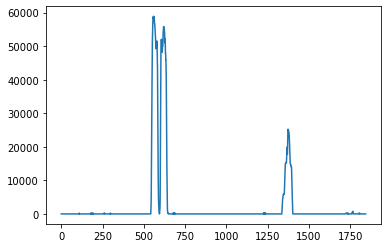

In [76]:
histogram = np.sum(mask_lane[img_height // 4 * 3:, :], axis=0)
plt.plot(np.arange(img_width), histogram)

In [90]:
import scipy.signal

midpoint = img_width // 2
left_base = np.argmax(histogram[:midpoint])
right_base = np.argmax(histogram[midpoint:]) + midpoint
print(left_base, right_base)

peaks, _ = scipy.signal.find_peaks(histogram, distance = 50, height=min(histogram[[left_base, right_base]])//2)
print(peaks)

559 1374
[ 559  620 1374]


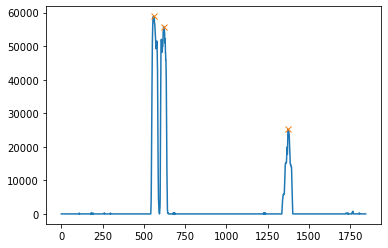

In [91]:
plt.plot(histogram)
plt.plot(peaks, histogram[peaks], "x")
plt.show()

In [95]:
imageCenter = img_width / 2
laneCenter = (right_base - left_base) / 2 + left_base
distanceToCenter = laneCenter - imageCenter
print(laneCenter, distanceToCenter)

966.5 44.0
